In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

we have 614 rows and 13 columns in this dataset.

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have int types,object types and float types of values which are independent variable and the Loan_Status is our target variable in this dataset.

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

There are total 13 columns including target variable, all of them are self explanatory.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

There are two unique values in df[Loan_Status].

In [15]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# EDA

# univariate analysis

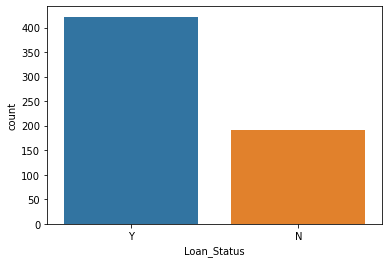

In [17]:
sns.countplot(df["Loan_Status"]);

Target class is imbalance issue exits.

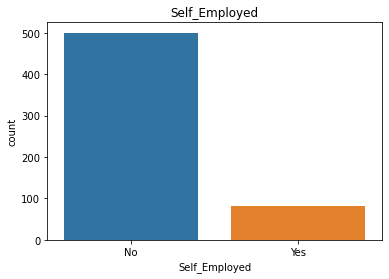

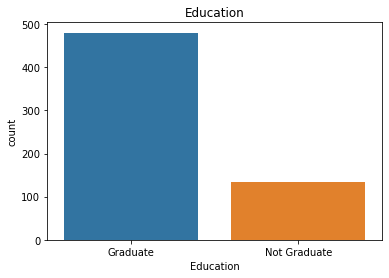

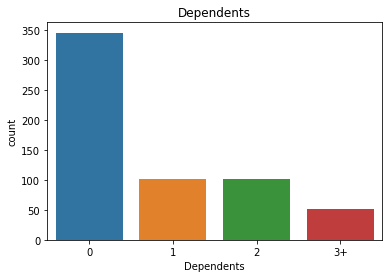

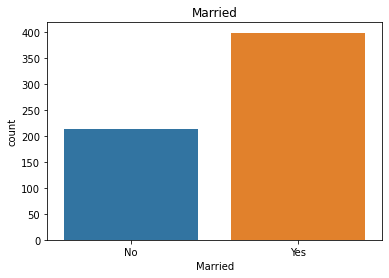

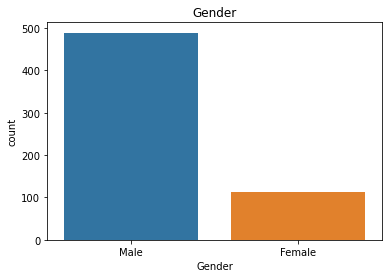

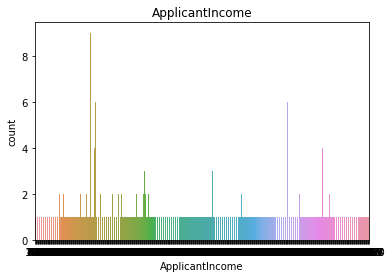

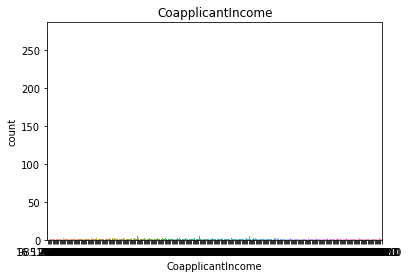

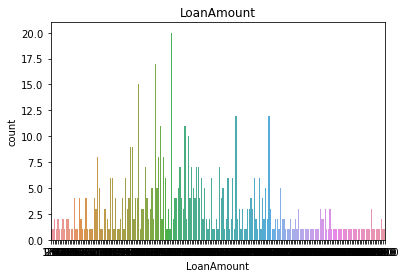

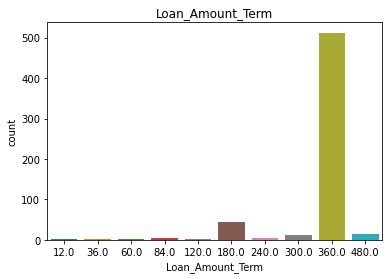

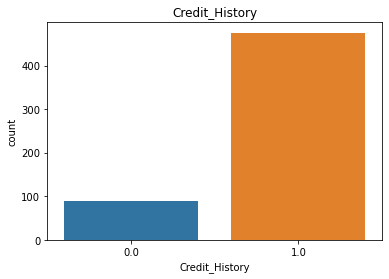

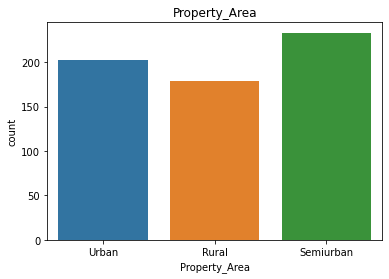

In [12]:
for col in ["Self_Employed","Education","Dependents","Married","Gender","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]:
    sns.countplot(df[col].dropna(),orient='v')
    plt.title(col)
    plt.show()

In Self_Employed plot no column has most values is present. In Education plot Graduate column has most values is present.
In Dependents plot 0 column has most values is present.In Married plot Yes column has most value is present.In Gender plot Male column has most values.In Loan_Amount_Term plot 360.0 column has most values is present.
In Credit_History plot 1.0 column has most values is present.In Property_Area plot has    Semiurban column has most values than other columns.

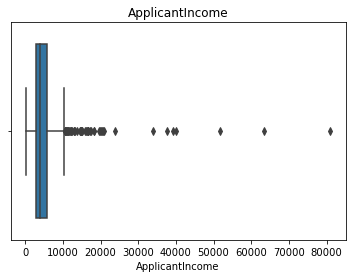

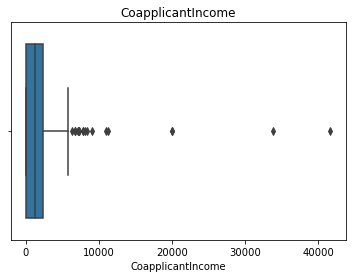

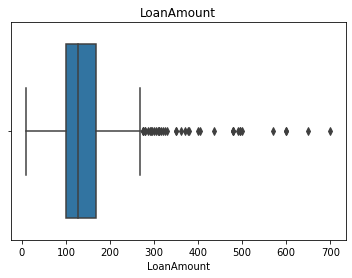

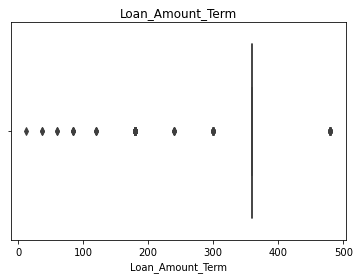

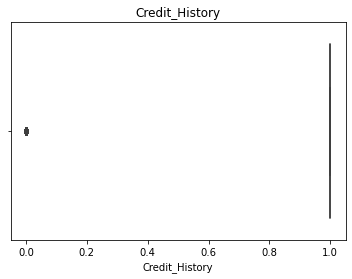

In [13]:
for col in ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]:
    sns.boxplot(df[col].dropna(),orient='v')
    plt.title(col)
    plt.show()

In given plot has shown in all columns has outliers are present.

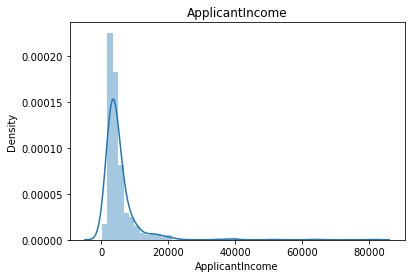

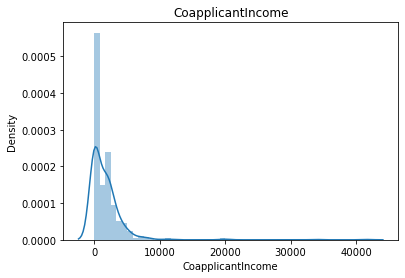

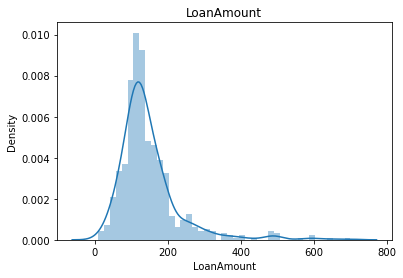

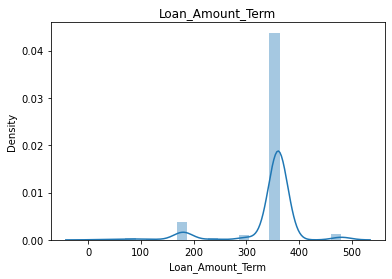

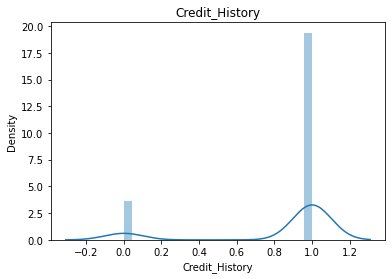

In [85]:
for col in ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]:
    sns.distplot(df[col].dropna())
    plt.title(col)
    plt.show()

 Data is normally distributed between the two plots LoanAmount and ApplicantIncome.

# Bivariate analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


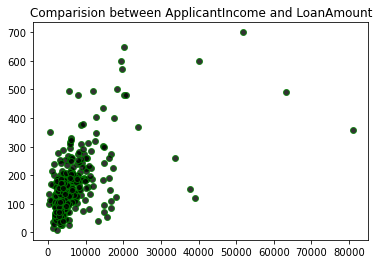

In [14]:
plt.scatter(df["ApplicantIncome"],df["LoanAmount"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between ApplicantIncome and LoanAmount")
plt.show()

outliers are present in this plot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


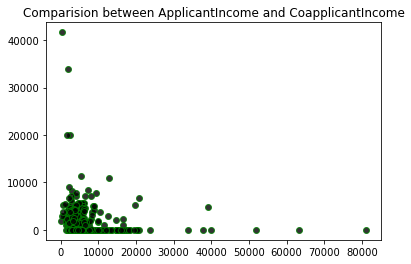

In [15]:
plt.scatter(df["ApplicantIncome"],df["CoapplicantIncome"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between ApplicantIncome and CoapplicantIncome")
plt.show()

outliers are present in this plot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


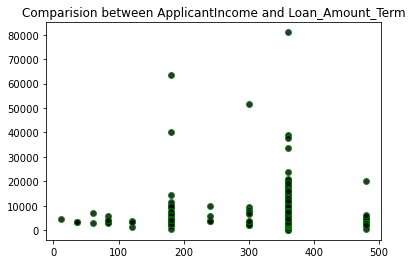

In [16]:
plt.scatter(df["Loan_Amount_Term"],df["ApplicantIncome"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between ApplicantIncome and Loan_Amount_Term")
plt.show()

outliers are present in this plot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


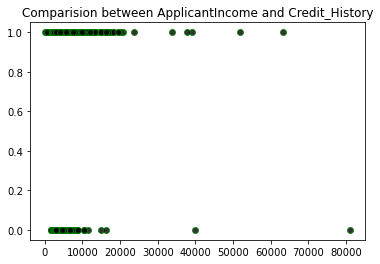

In [17]:
plt.scatter(df["ApplicantIncome"],df["Credit_History"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between ApplicantIncome and Credit_History")
plt.show()

outliers are present in this plot.

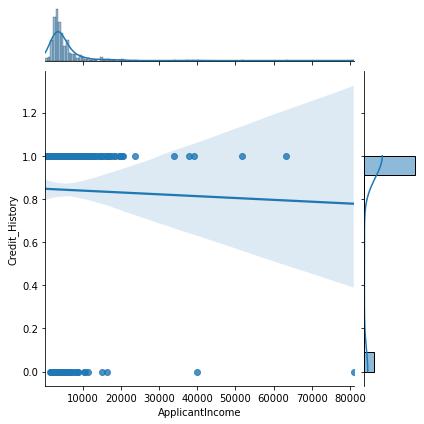

In [18]:
sns.jointplot(data=df,x='ApplicantIncome',y='Credit_History',kind='reg')

using jointplot to find the best line or curve that fits the plots.In this plot ApplicantIncome and Credit_History are two variables in ploting.

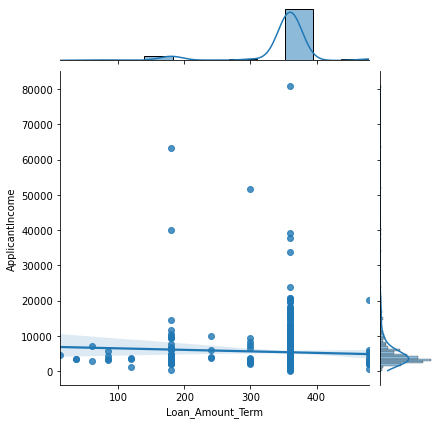

In [19]:
sns.jointplot(data=df,x='Loan_Amount_Term',y='ApplicantIncome',kind='reg')

using jointplot to find the best line or curve that fits the plots.In this plot Loan_Amount_Term and ApplicantIncome are two variables in ploting.

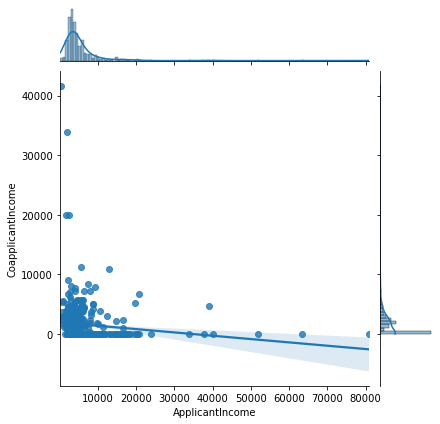

In [20]:
sns.jointplot(data=df,x='ApplicantIncome',y='CoapplicantIncome',kind='reg')

using jointplot to find the best line or curve that fits the plots.In this plot CoapplicantIncome and ApplicantIncome are two variables in ploting.

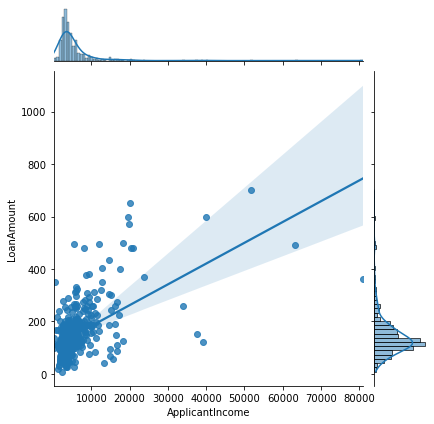

In [21]:
sns.jointplot(data=df,x='ApplicantIncome',y='LoanAmount',kind='reg')

using jointplot to find the best line or curve that fits the plots.In this plot LoanAmount and ApplicantIncome are two variables in ploting.

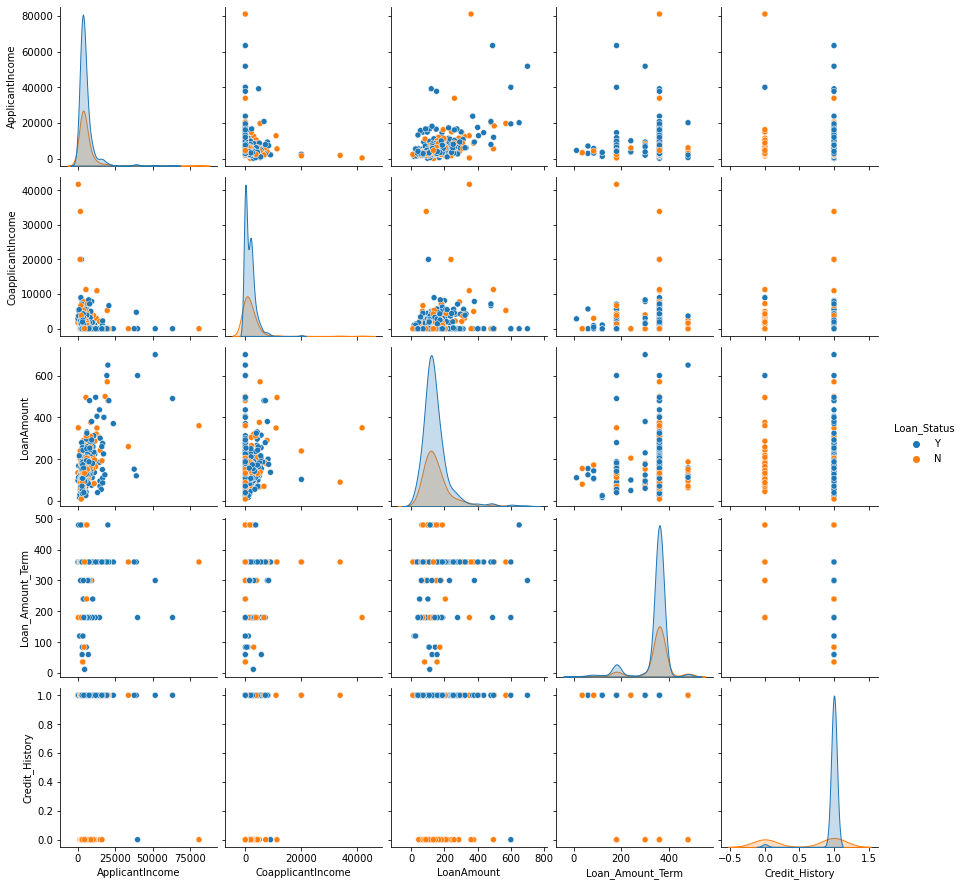

In [94]:
sns.pairplot(df,hue="Loan_Status")

We can check the corelation between dependent and independent features using dataframe.corr() function. This plot pairwise relationships in a dataset.

# checking correlation

In [18]:
cor=df.corr()
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


This column is checking correlation between different different columns.

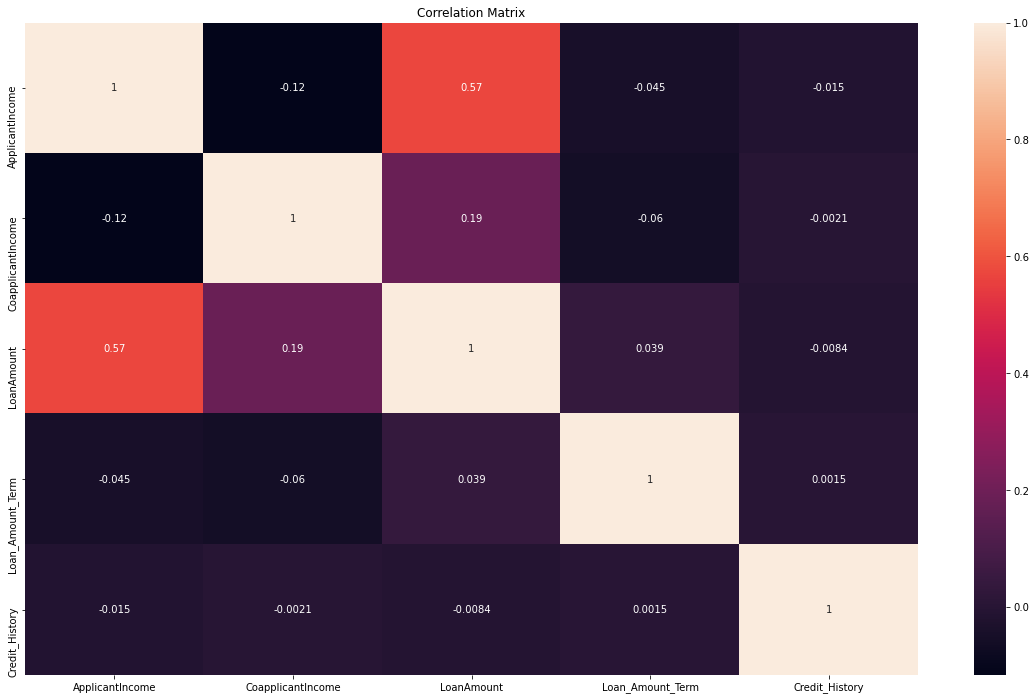

In [19]:
plt.figure(figsize=[20,12])
sns.heatmap(cor,annot=True)
plt.title("Correlation Matrix")
plt.show()

I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph.
we see that ApplicantIncome and LoanAmount have high colinearity. Also credit history seems to be highly correlated with loan status, this points to it being the most important feature for our model.

# correlation matrix

In [32]:
corr_matrix=df.corr()
corr_matrix["Loan_Status"].sort_values(ascending=False)

Loan_Status         1.000000
Credit_History      0.561678
Married             0.096657
Property_Area       0.032112
Loan_ID             0.011773
Self_Employed       0.010880
Gender              0.008690
ApplicantIncome    -0.004710
Dependents         -0.007318
Loan_Amount_Term   -0.021268
LoanAmount         -0.037318
Education          -0.085884
Name: Loan_Status, dtype: float64

I am finding the correlation value of each column. Their are identify the corrlation of independent variable with target variable "Loan_Status".

# label encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [22]:
df["Loan_Status"]=LE.fit_transform(df["Loan_Status"])
df["Loan_Status"].unique()

array([1, 0])

In [23]:
df["Loan_ID"]=LE.fit_transform(df["Loan_ID"])
df["Loan_ID"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [24]:
df["Gender"]=LE.fit_transform(df["Gender"])
df["Gender"].unique()

array([1, 0, 2])

In [25]:
df["Married"]=LE.fit_transform(df["Married"])
df["Married"].unique()

array([0, 1, 2])

In [26]:
df["Dependents"]=LE.fit_transform(df["Dependents"])
df["Dependents"].unique()

array([0, 1, 2, 3, 4])

In [27]:
df["Education"]=LE.fit_transform(df["Education"])
df["Education"].unique()

array([0, 1])

In [28]:
df["Self_Employed"]=LE.fit_transform(df["Self_Employed"])
df["Self_Employed"].unique()

array([0, 1, 2])

In [29]:
df["Property_Area"]=LE.fit_transform(df["Property_Area"])
df["Property_Area"].unique()

array([2, 0, 1])

There are 8 columns is object types variable . Using Label encoder these 8 column is converting into int type.

In [30]:
df.drop('CoapplicantIncome',axis=1,inplace=True)

In [31]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,187.0,360.0,1.0,2,1


# Handling missing values:

In [33]:
categ_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 
              'Credit_History']
for col in categ_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [34]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [35]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,187.000000,360.0,1.0,2,1


In [36]:
df.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

# outlier removal

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))

new_df=df[(z<5).all(axis=1)]

In [45]:
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,187.000000,360.0,1.0,2,1


In [46]:
new_df.shape

(604, 12)

In [40]:
df.shape

(614, 12)

In [47]:
(10/614)*100

1.6286644951140066

outliers are removed in this dataset.

# skewness

In [48]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [49]:
x.skew()

Loan_ID             0.000000
Gender             -0.953015
Married            -0.538097
Dependents          1.089068
Education           1.367622
Self_Employed       2.191118
ApplicantIncome     6.539513
LoanAmount          2.726601
Loan_Amount_Term   -2.402112
Credit_History     -2.021971
Property_Area      -0.066196
dtype: float64

In [55]:
from sklearn.preprocessing import power_transform
new_df=power_transform(x)

new_df=pd.DataFrame(new_df,columns=x.columns)

In [56]:
new_df.skew()

Loan_ID            -0.287022
Gender              0.222596
Married            -0.310754
Dependents          0.376295
Education           1.367622
Self_Employed       1.620854
ApplicantIncome    -0.092946
LoanAmount          0.024376
Loan_Amount_Term    0.392571
Credit_History     -2.021971
Property_Area      -0.158267
dtype: float64

skewness has been removed.

# Handling class imbalance problem by oversampling the minority class

In [58]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [59]:
y_over.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# standard scaler

In [63]:
from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()
scaledX=scaling.fit_transform(df)

In [64]:
scaledX

array([[-1.72923217,  0.38261602, -1.35784704, ...,  0.41173269,
         1.22329839,  0.67451931],
       [-1.7235903 ,  0.38261602,  0.70581158, ...,  0.41173269,
        -1.31851281, -1.48253724],
       [-1.71794844,  0.38261602,  0.70581158, ...,  0.41173269,
         1.22329839,  0.67451931],
       ...,
       [ 1.71794844,  0.38261602,  0.70581158, ...,  0.41173269,
         1.22329839,  0.67451931],
       [ 1.7235903 ,  0.38261602,  0.70581158, ...,  0.41173269,
         1.22329839,  0.67451931],
       [ 1.72923217, -1.99037625, -1.35784704, ..., -2.42876026,
        -0.04760721, -1.48253724]])

# PCA

In [65]:
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

In [66]:
Y.explained_variance_ratio_

array([0.1557108 , 0.13197293, 0.12020928, 0.09805122, 0.08847278,
       0.07831124, 0.07403305, 0.07015091, 0.06306071, 0.04822132,
       0.03873402, 0.03307175])

In [67]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 15.57107951,  28.76837218,  40.78930039,  50.59442221,
        59.44169983,  67.27282415,  74.67612882,  81.69122025,
        87.99729081,  92.81942298,  96.69282476, 100.        ])

# creating final dataset with 10 columns

In [71]:
FinalPCA=PCA(n_components=9)
FinalData=FinalPCA.fit_transform(scaledX)

In [72]:
FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8
0,-0.721489,-1.063939,0.765079,-1.935121,-0.414913,0.161067,-0.824986,0.312782,0.432583
1,0.186794,0.631749,-0.210884,-0.500044,-1.247125,1.176078,-0.791017,-0.326019,-1.526814
2,-0.444937,-1.301870,-0.343539,-1.885904,0.328338,1.639093,0.117125,-0.818634,0.297263
3,-0.642614,-0.629012,-1.369680,-1.420301,-0.177961,1.021307,-0.959275,1.519290,0.847976
4,-0.742697,-1.063343,0.751098,-1.922484,-0.406919,0.149347,-0.817423,0.301694,0.439356
...,...,...,...,...,...,...,...,...,...
609,-2.099431,-0.727343,1.201699,2.014712,-0.079446,-1.322105,0.594456,-0.121332,-0.706205
610,0.760135,-0.385609,-2.251357,1.725549,1.136917,-1.732915,0.237462,-1.151407,-1.564095
611,1.458239,-0.744574,0.129684,0.227336,-0.280430,-1.443844,0.733650,-0.135926,1.451795
612,1.323023,-0.647446,-0.503723,0.211699,-0.215673,-1.447860,1.329699,-0.113304,1.147064


In [73]:
k=np.argmax(var_cumu>90)
print("Number of components explaining 90% variance: ",k)

Number of components explaining 90% variance:  9


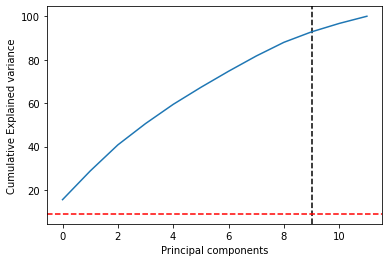

In [74]:
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=9, color="r",  linestyle="--")

plt.plot(var_cumu)
plt.show()

PCA gives new indicators which are linear combinations of the original ones, thus the new indicators combines similar old indicators through their shared properties, you are going to redefine these new indicators according to your understanding of the potential shared properties.

# finding best random_state

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

# Logistic regression

In [107]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
lg_accu=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7586206896551724
[[ 25  46]
 [  3 129]]
              precision    recall  f1-score   support

           0       0.89      0.35      0.51        71
           1       0.74      0.98      0.84       132

    accuracy                           0.76       203
   macro avg       0.81      0.66      0.67       203
weighted avg       0.79      0.76      0.72       203



# RandomForestClassifier

In [108]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf_accu=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7684729064039408
[[ 29  42]
 [  5 127]]
              precision    recall  f1-score   support

           0       0.85      0.41      0.55        71
           1       0.75      0.96      0.84       132

    accuracy                           0.77       203
   macro avg       0.80      0.69      0.70       203
weighted avg       0.79      0.77      0.74       203



# SVC

In [109]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
svc_accu=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6502463054187192
[[  0  71]
 [  0 132]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.65      1.00      0.79       132

    accuracy                           0.65       203
   macro avg       0.33      0.50      0.39       203
weighted avg       0.42      0.65      0.51       203



# AdaBoostClassifier

In [110]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
ad_accu=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7586206896551724
[[ 28  43]
 [  6 126]]
              precision    recall  f1-score   support

           0       0.82      0.39      0.53        71
           1       0.75      0.95      0.84       132

    accuracy                           0.76       203
   macro avg       0.78      0.67      0.69       203
weighted avg       0.77      0.76      0.73       203



# DecisionTreeClassifier

In [111]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
dt_accu=accuracy_score(y_test,pred)

print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6896551724137931
[[ 38  33]
 [ 30 102]]
              precision    recall  f1-score   support

           0       0.56      0.54      0.55        71
           1       0.76      0.77      0.76       132

    accuracy                           0.69       203
   macro avg       0.66      0.65      0.66       203
weighted avg       0.69      0.69      0.69       203



# GradientBoostingClassifier

In [112]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
gbc_accu=accuracy_score(y_test,pred)

print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7487684729064039
[[ 29  42]
 [  9 123]]
              precision    recall  f1-score   support

           0       0.76      0.41      0.53        71
           1       0.75      0.93      0.83       132

    accuracy                           0.75       203
   macro avg       0.75      0.67      0.68       203
weighted avg       0.75      0.75      0.72       203



In [113]:
results = pd.DataFrame({
    'Model': ['SVC','Random Forest',  'Decision Tree','AdaBoostClassifier',
             'LogisticRegression','GradientBoostingClassifier'],
               
    
    'Score': [svc_accu,  
             rf_accu,  dt_accu,   
              ad_accu,lg_accu,gbc_accu]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.768473,Random Forest
0.758621,AdaBoostClassifier
0.758621,LogisticRegression
0.748768,GradientBoostingClassifier
0.689655,Decision Tree
0.650246,SVC


Random Forest Classifier is accuracy score ,precision ,recall and f1-score is good than other models,Hence Random Forest Classifier is performing is good. Random Forest Classifier is best model for this dataset.

# cross validation

In [114]:
from sklearn.model_selection import cross_val_score

In [127]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7214314274290283


In [128]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.7475009996001599


In [129]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.6923230707716913


In [130]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.8029321604691457


In [131]:
print(cross_val_score(gbc,x,y,cv=5).mean())

0.7133946421431427


In [126]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.6872984139677463


# AUC-ROC curve

In [132]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [133]:
#Random ForestClassifier
y_pred_prob=rf.predict_proba(x_test)[:,1]

In [134]:
y_pred_prob

array([0.71, 0.83, 0.68, 0.43, 0.92, 0.26, 0.78, 0.59, 0.96, 0.07, 0.67,
       0.7 , 0.52, 0.85, 0.61, 0.77, 0.93, 0.87, 0.79, 0.95, 0.88, 0.89,
       0.69, 0.78, 0.89, 0.82, 0.86, 0.3 , 0.63, 0.58, 0.77, 0.57, 0.54,
       0.14, 0.73, 0.92, 0.91, 0.92, 0.77, 0.82, 0.79, 0.85, 0.73, 0.66,
       0.79, 0.84, 0.52, 0.14, 0.83, 0.83, 0.69, 0.48, 0.85, 0.91, 0.97,
       0.12, 0.47, 0.07, 0.73, 0.63, 0.75, 0.68, 0.93, 0.11, 0.13, 0.89,
       0.98, 0.95, 0.73, 0.88, 0.94, 0.85, 0.73, 0.15, 0.51, 0.74, 0.8 ,
       0.87, 0.05, 0.17, 0.12, 0.91, 0.46, 0.51, 0.64, 0.59, 0.87, 0.81,
       0.65, 0.9 , 0.11, 0.77, 0.8 , 0.94, 0.9 , 0.99, 0.93, 0.69, 0.94,
       0.82, 0.88, 0.9 , 0.89, 0.91, 0.72, 0.76, 0.57, 0.83, 0.13, 0.6 ,
       0.92, 0.81, 0.68, 0.54, 0.18, 0.97, 0.84, 0.86, 0.8 , 0.89, 0.87,
       0.06, 0.8 , 0.22, 0.78, 0.73, 0.63, 0.34, 0.92, 0.58, 0.87, 0.09,
       0.75, 0.81, 0.94, 0.74, 0.7 , 0.44, 0.78, 0.91, 0.84, 0.68, 0.8 ,
       0.91, 0.16, 0.89, 0.92, 0.91, 0.9 , 0.77, 0.

In [135]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [136]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01408451, 0.02816901, 0.05633803, 0.07042254, 0.09859155,
       0.12676056, 0.12676056, 0.12676056, 0.15492958, 0.16901408,
       0.16901408, 0.1971831 , 0.22535211, 0.23943662, 0.26760563,
       0.29577465, 0.29577465, 0.30985915, 0.30985915, 0.36619718,
       0.36619718, 0.38028169, 0.4084507 , 0.42253521, 0.43661972,
       0.43661972, 0.46478873, 0.46478873, 0.46478873, 0.47887324,
       0.50704225, 0.50704225, 0.50704225, 0.53521127, 0.54929577,
       0.57746479, 0.5915493 , 0.5915493 , 0.6056338 , 0.6056338 ,
       0.63380282, 0.63380282, 0.66197183, 0.74647887, 0.8028169 ,
       0.88732394, 0.91549296, 0.92957746, 0.95774648, 0.97183099,
       1.        ])

In [137]:
tpr

array([0.        , 0.00757576, 0.01515152, 0.06060606, 0.10606061,
       0.12878788, 0.16666667, 0.21212121, 0.23484848, 0.27272727,
       0.28787879, 0.32575758, 0.34848485, 0.37878788, 0.41666667,
       0.47727273, 0.53787879, 0.57575758, 0.59090909, 0.60606061,
       0.62878788, 0.64393939, 0.65909091, 0.67424242, 0.70454545,
       0.73484848, 0.73484848, 0.75757576, 0.78030303, 0.81060606,
       0.82575758, 0.83333333, 0.84848485, 0.85606061, 0.87121212,
       0.87878788, 0.88636364, 0.90909091, 0.93939394, 0.9469697 ,
       0.95454545, 0.96212121, 0.96969697, 0.96969697, 0.98484848,
       0.98484848, 0.99242424, 0.99242424, 0.99242424, 0.99242424,
       0.99242424, 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [138]:
thresholds

array([1.99, 0.99, 0.98, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.89, 0.88,
       0.87, 0.86, 0.85, 0.84, 0.83, 0.81, 0.8 , 0.79, 0.78, 0.77, 0.76,
       0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68, 0.67, 0.66, 0.65,
       0.64, 0.63, 0.61, 0.6 , 0.59, 0.57, 0.54, 0.52, 0.51, 0.48, 0.47,
       0.44, 0.34, 0.3 , 0.26, 0.15, 0.13, 0.11, 0.09, 0.08, 0.07, 0.06,
       0.05])

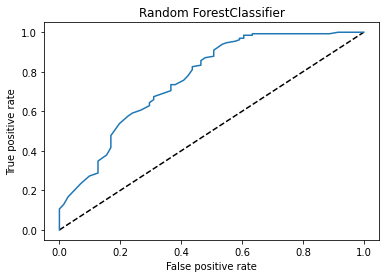

0.6852859581732822

In [144]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random ForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

# hyper parameter tuning

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [149]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [150]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [151]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [152]:
CV_rfc.best_score_

0.8271525124889803

In [180]:
#DecisionTreeClassifier
parameter = {'max_depth' : np.arange(2,10),
              'criterion':['gini','entropy']}

In [154]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [155]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [156]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [157]:
GCV.best_score_

0.8198354393182485

In [158]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1]}

In [159]:
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=5)

In [160]:
search.fit(x,y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

In [161]:
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [162]:
search.best_score_

0.809462881514061

In [179]:
#GradientBoostingClassifier
parameters= {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [166]:
cv = GridSearchCV(gbc,parameters,cv=5)

In [167]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [168]:
cv.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}

In [169]:
cv.best_score_

0.8271525124889803

# saving the model

In [170]:
import pickle
filename='Loan_prediction.pkl'
pickle.dump(dt,open(filename,'wb'))

# conclusion

In [173]:
loaded_model=pickle.load(open('Loan_prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.6896551724137931


In [177]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["predicted","original"])

In [178]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
predicted,1,0,0,1,0,0,0,0,1,0,...,1,1,0,1,1,1,1,1,0,1
original,1,1,1,0,1,0,1,0,1,0,...,1,1,0,1,1,1,1,0,1,1
